### **Mini-Batch Gradient Descent**

In [10]:
import random
import numpy as np
from sklearn.datasets import load_diabetes

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
dataset = load_diabetes(as_frame = True)
df = dataset['data'].loc[:,['s1','s2','s3','s4','s5','s6']]
df['target'] = dataset['target'] 

In [3]:
df.head()

,s1,s2,s3,s4,s5,s6,target
0,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


#### Plotting Pairplot

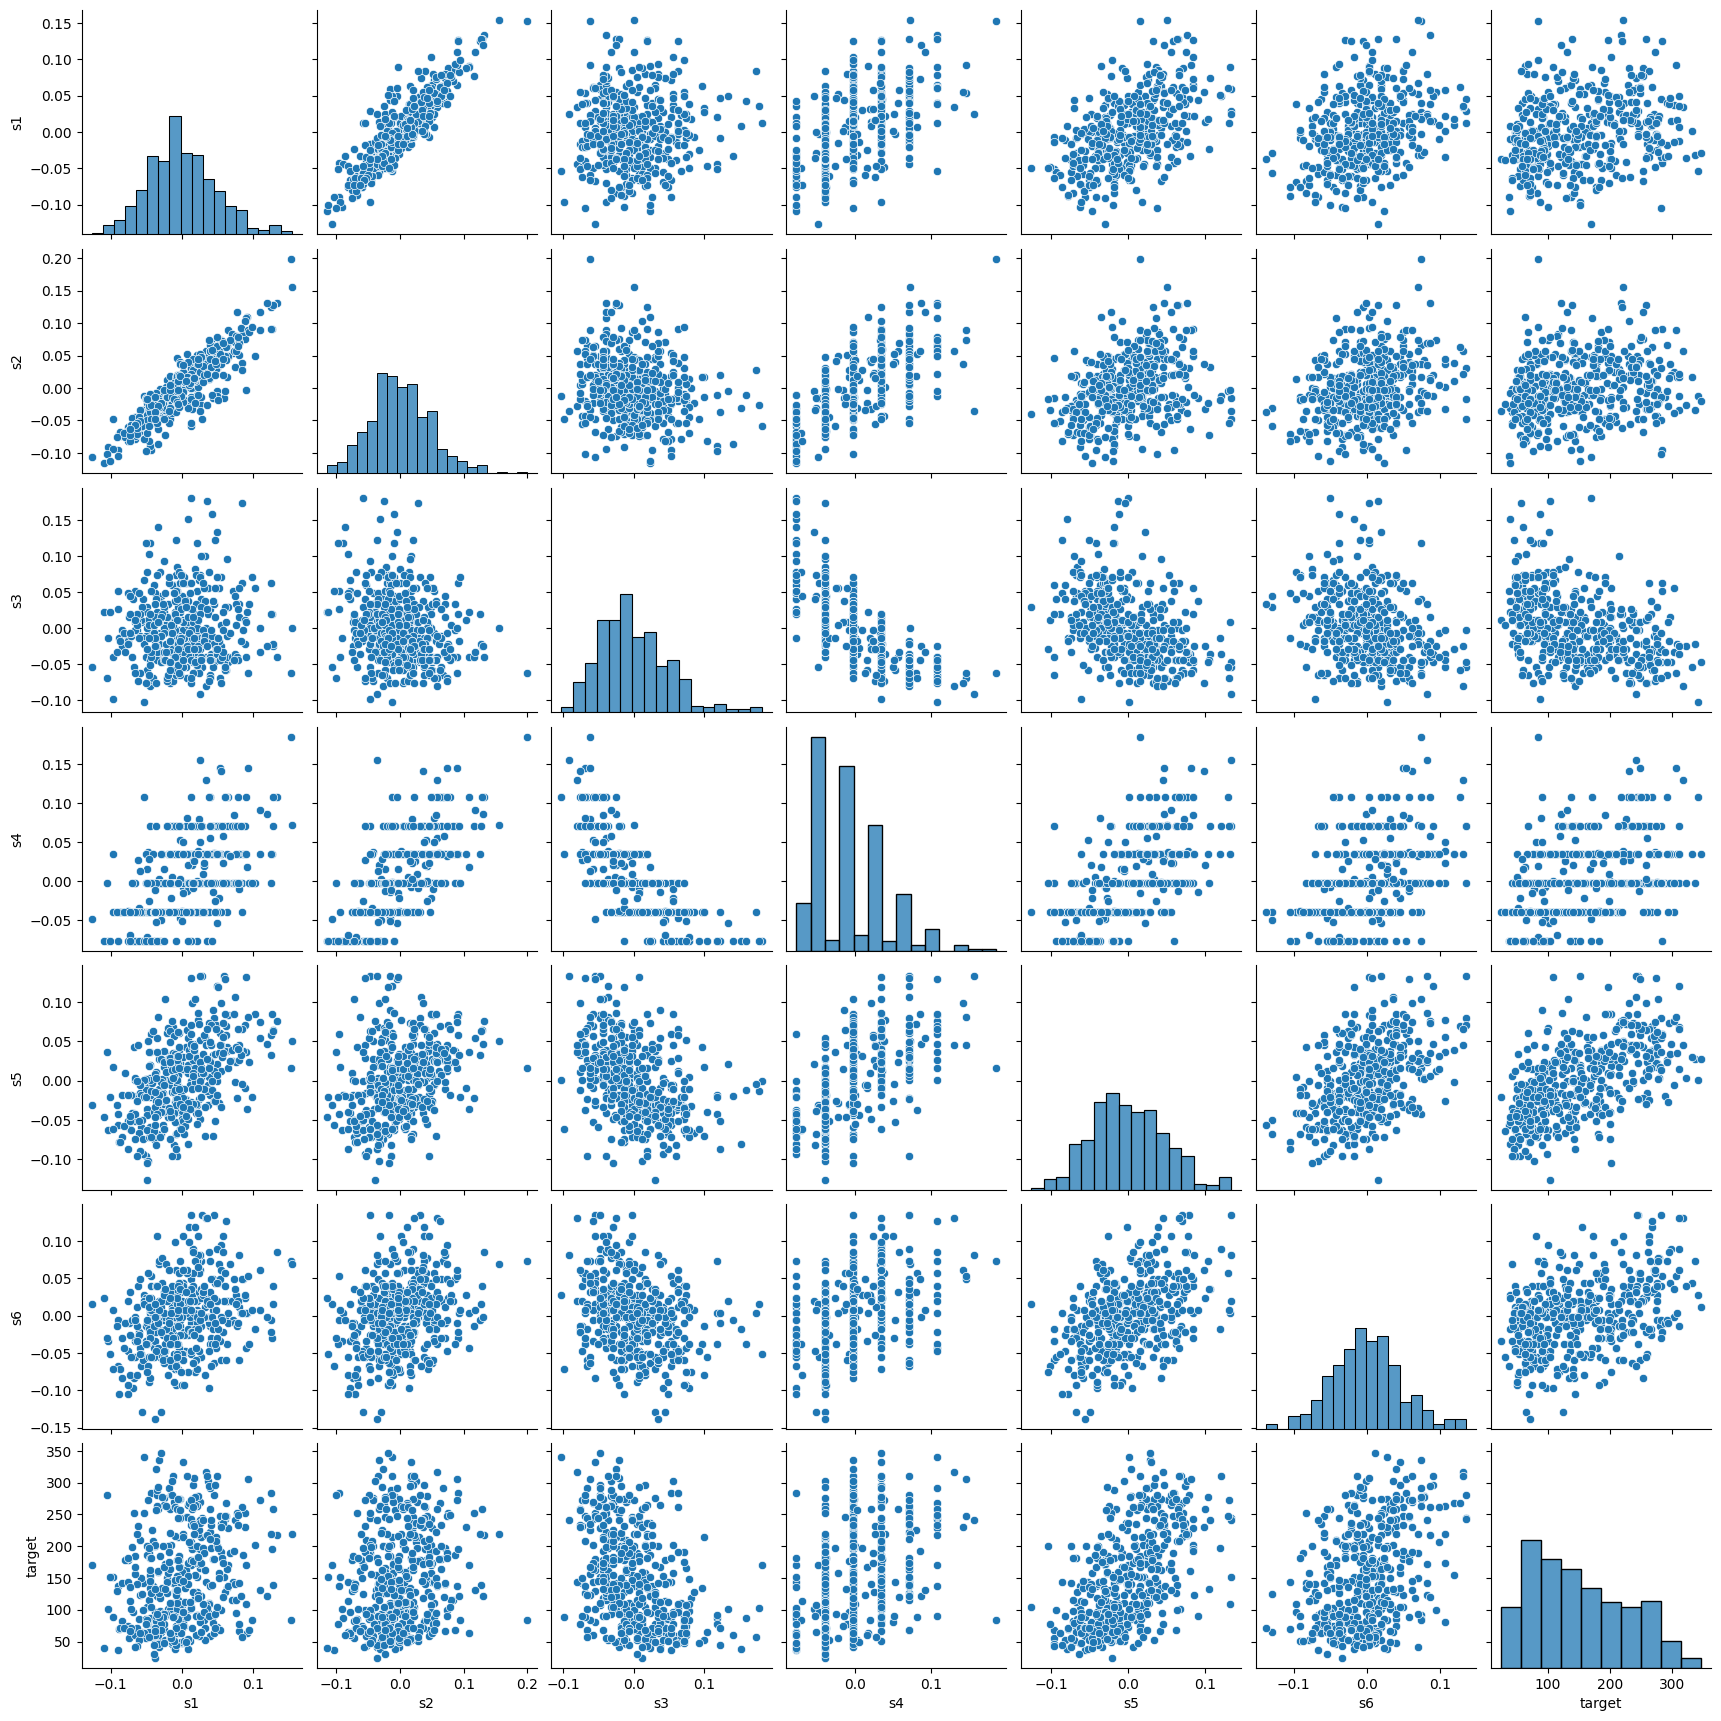

In [69]:
sns.pairplot(df)
plt.show()

#### Train Test Split

In [4]:
X = df.loc[:, ['s1','s2','s3','s4','s5','s6']]
y = df['target']

In [5]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

#### Model training and testing

In [6]:
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression()

In [8]:
model.coef_

array([-1166.87578114,   949.18468473,   124.31356982,   -93.94332588,
        1255.37404038,   217.86772931])

In [9]:
model.intercept_

151.26256422645218

### **Creating our own Mini-Batch Gradient Descent Class**

In [15]:
class gradient_descent:
    def __init__(self, batch_size, learning_rate, epochs) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.batch_size = batch_size
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        # Initilizing random values of coef and intercept, generally
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0

        for i in range(self.epochs): 
            # batch wise looping
            for j in range(int(X_train.shape[0]/self.batch_size)):

                # Generating random set of indices
                idx = random.sample(range(X_train.shape[0]), self.batch_size)

                # Using fancy indexing
                y_hat = (np.dot(X_train.iloc[idx], self.coef_) + self.intercept_)

                # Calculation of intercept
                intercept_der = -2 * np.mean(y_train.iloc[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                # Calculation of coef
                coef_der = (-2 * X_train.shape[0]) * np.dot(y_train.iloc[idx] - y_hat, X_train.iloc[idx]) # How dot product
                self.coef_ = self.coef_ - (self.lr * coef_der)
    
    def predict(self, X_test):
        return self.intercept_ + np.dot(X_test, self.coef_)

In [22]:
gd = gradient_descent(10, 0.01, 100)

In [23]:
gd.fit(X_train, y_train)

#### Slope and Intercept

In [24]:
gd.coef_

array([-1226.87356679,   833.18811168,   277.43983147,    66.6599898 ,
        1190.2152579 ,   229.81507458])

In [25]:
gd.intercept_

150.2342351957407

#### Model Prediction and r2_score

In [26]:
y_pred = gd.predict(x_test)

In [27]:
r2_score(y_test, y_pred)

0.2815659063185677